In [ ]:
#library
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score




<ipython-input-2-37710c5d2ad1>:9: RuntimeWarning: invalid value encountered in log
  return np.exp(-x**2) + np.log(x)*np.sin(3*x)


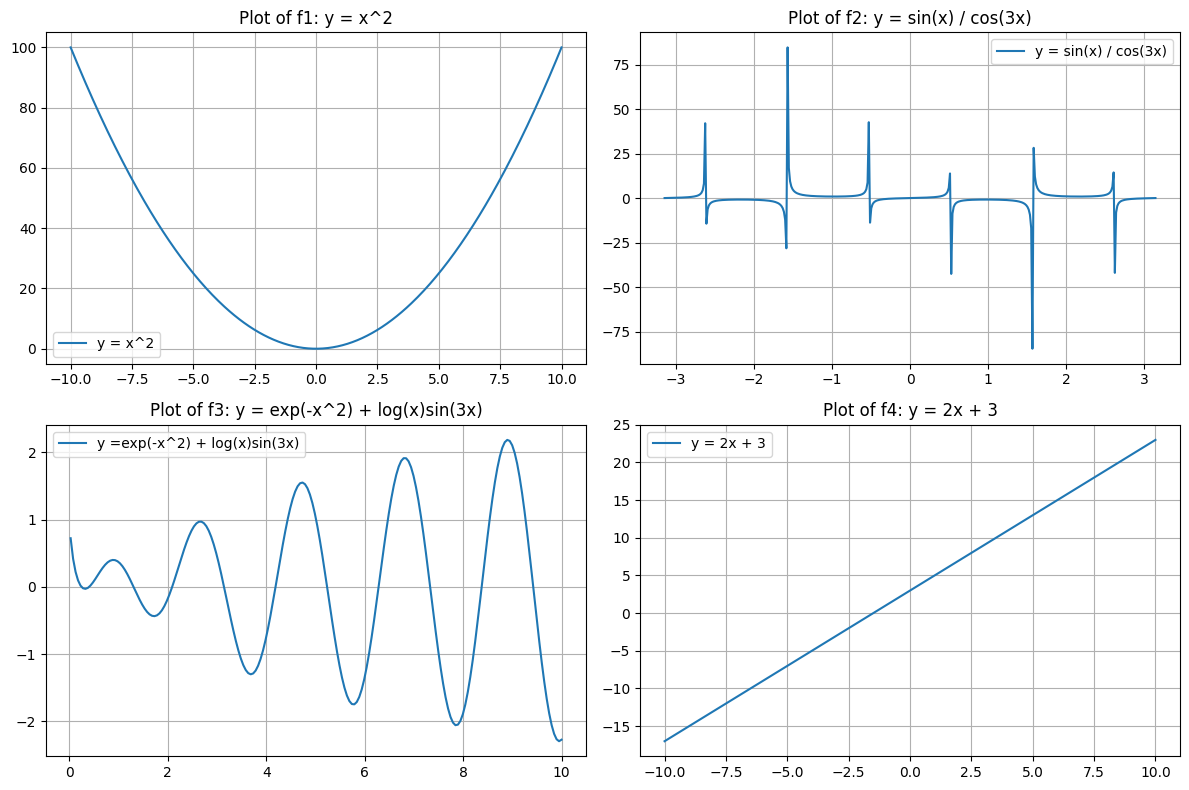

In [ ]:
# Defining Function
def f1(x):
    return x**2

def f2(x):
    return np.sin(x)/np.cos(3*x)

def f3(x):
    return np.exp(-x**2) + np.log(x)*np.sin(3*x)

def f4(x):
    return 2*x + 3

x = np.linspace(-10, 10, 400)
x_f2 = np.linspace(-np.pi, np.pi, 400)  # Restrict domain for f2 to avoid singularities

# Calculate y values for each function
y1 = f1(x)
y2 = f2(x_f2)
y3 = f3(x)
y4 = f4(x)

# Create figure and axes
plt.figure(figsize=(12, 8))

# Plotting each function
plt.subplot(2, 2, 1)
plt.plot(x, y1, label="y = x^2")
plt.title("Plot of f1: y = x^2")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x_f2, y2, label="y = sin(x) / cos(3x)")
plt.title("Plot of f2: y = sin(x) / cos(3x)")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, y3, label="y =exp(-x^2) + log(x)sin(3x)")
plt.title("Plot of f3: y = exp(-x^2) + log(x)sin(3x)")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, y4, label="y = 2x + 3")
plt.title("Plot of f4: y = 2x + 3")
plt.grid(True)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




Train set (X_train, y_train): (160, 1) (160,)
Test set (X_test, y_test): (40, 1) (40,)


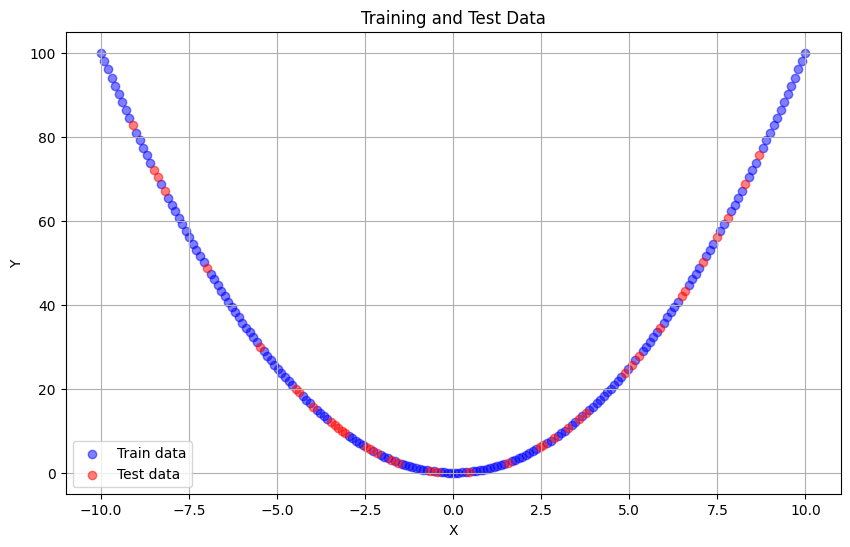

In [ ]:
#f1
from sklearn.model_selection import train_test_split

# Define the function
def f1(x):
    return x**2

# Generate synthetic data
np.random.seed(0)  # For reproducibility
x = np.linspace(-10, 10, 200)
y = f1(x)


# Reshape x to match the expected shape for scikit-learn (2D array)
X = x.reshape(-1, 1)

# Split the data into train and test sets (80% train, 20% test)
X_f1_train, X_f1_test, y_f1_train, y_f1_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting splits
print("Train set (X_train, y_train):", X_f1_train.shape, y_f1_train.shape)
print("Test set (X_test, y_test):", X_f1_test.shape, y_f1_test.shape)


plt.figure(figsize=(10, 6))
plt.scatter(X_f1_train, y_f1_train, color='blue', label='Train data', alpha=0.5)
plt.scatter(X_f1_test, y_f1_test, color='red', label='Test data', alpha=0.5)
plt.legend()
plt.title("Training and Test Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()



In [ ]:
# building mlp model f1

model = Sequential([
    Dense(512, activation='relu', input_shape=(1,)),  # Input layer
    Dense(256, activation='relu'),                    #Hidden layer 1
    Dense(128, activation='relu'),                    # Hidden layer 2
    Dense(1)                                          # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# examining model and results

model.fit(X_f1_train, y_f1_train, epochs=50, batch_size=32)
predicted = model.predict(X_f1_test)



Epoch 1/50
5/5 [==============================] - 7s 11ms/step - loss: 2045.6234
Epoch 2/50
5/5 [==============================] - 0s 11ms/step - loss: 1674.6910
Epoch 3/50
5/5 [==============================] - 0s 6ms/step - loss: 1150.5245
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 541.5267
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 189.8702
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 282.5670
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 217.1690
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 144.9673
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 172.2271
Epoch 10/50
5/5 [==============================] - 0s 5ms/step - loss: 160.0468
Epoch 11/50
5/5 [==============================] - 0s 5ms/step - loss: 140.7985
Epoch 12/50
5/5 [==============================] - 0s 6ms/step - loss: 139.8936
Epoch 13/50
5/5 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 3.4635
Test Loss: 3.4635181427001953


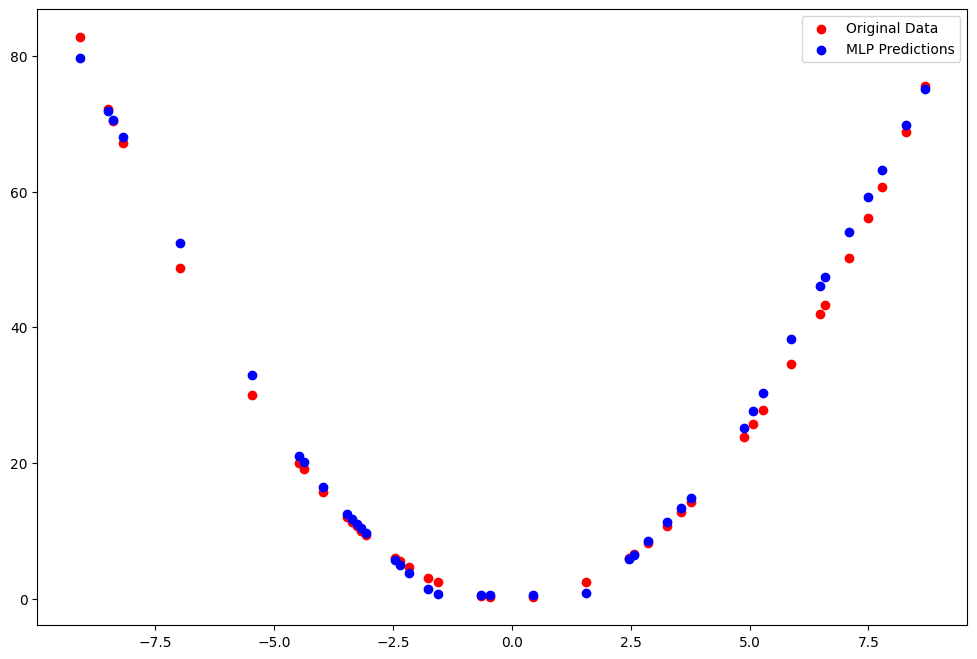

In [ ]:
#f1 visualization
loss = model.evaluate(X_f1_test, y_f1_test, verbose=1)
print("Test Loss:", loss)

plt.figure(figsize=(12, 8))
plt.scatter(X_f1_test, y_f1_test , color='red', label='Original Data')
plt.scatter(X_f1_test, predicted, color='blue', label='MLP Predictions')
plt.legend()
plt.show()

Train set (X_train, y_train): (795, 1) (795,)
Test set (X_test, y_test): (199, 1) (199,)


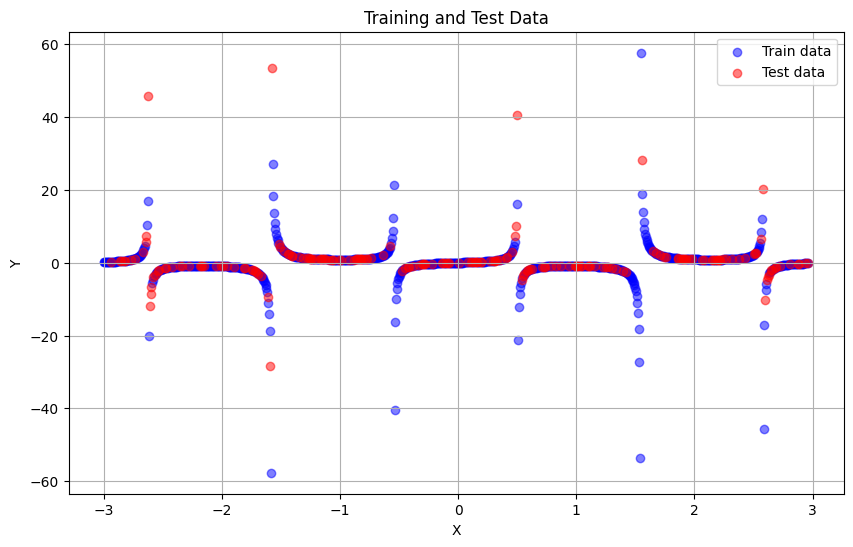

In [ ]:


#f2
from sklearn.model_selection import train_test_split

# Define the function
def f2(x):
    return np.sin(x)/np.cos(3*x)

# Generate synthetic data
np.random.seed(0)  # For reproducibility
x = np.linspace(-3, 3, 1000)
y = f2(x)

def remove_outliers_zscore(y, threshold=1):
    z_scores = np.abs((y - np.mean(y)) / np.std(y))
    return y[(z_scores < threshold)]


y = remove_outliers_zscore(y)
x = x[:len(y)]
# Reshape x to match the expected shape for scikit-learn (2D array)
X = x.reshape(-1, 1)


# Split the data into train and test sets (80% train, 20% test)
X_f2_train, X_f2_test, y_f2_train, y_f2_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting splits
print("Train set (X_train, y_train):", X_f2_train.shape, y_f2_train.shape)
print("Test set (X_test, y_test):", X_f2_test.shape, y_f2_test.shape)


plt.figure(figsize=(10, 6))
plt.scatter(X_f2_train, y_f2_train, color='blue', label='Train data', alpha=0.5)
plt.scatter(X_f2_test, y_f2_test, color='red', label='Test data', alpha=0.5)
plt.legend()
plt.title("Training and Test Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [ ]:
model = Sequential([
    Dense(350, activation='relu', input_shape=(1,)),  # Input layer

    Dense(128, activation='relu'),                     # Hidden layer 4
    Dense(64, activation='relu'),                      # Hidden layer 5
    Dense(32, activation='linear'),                    # Hidden layer 6
    Dense(1)                                             # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# examining model and results

model.fit(X_f2_train, y_f2_train, epochs=200, batch_size=64)
predicted = model.predict(X_f2_test)
loss = model.evaluate(X_f2_test, y_f2_test, verbose=1)


Epoch 1/200
25/25 [==============================] - 3s 4ms/step - loss: 30.1799
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 30.0831
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 30.0192
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 30.0350
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 30.1616
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 30.0501
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 30.0512
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 30.0173
Epoch 9/200
25/25 [==============================] - 0s 4ms/step - loss: 29.9513
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 29.9602
Epoch 11/200
25/25 [==============================] - 0s 4ms/step - loss: 29.9522
Epoch 12/200
25/25 [==============================] - 0s 4ms/step - loss: 29.9553
Epoch 13/200
25/25 [=====

Test Loss: 0.0019391995156183839


ValueError: x and y must be the same size

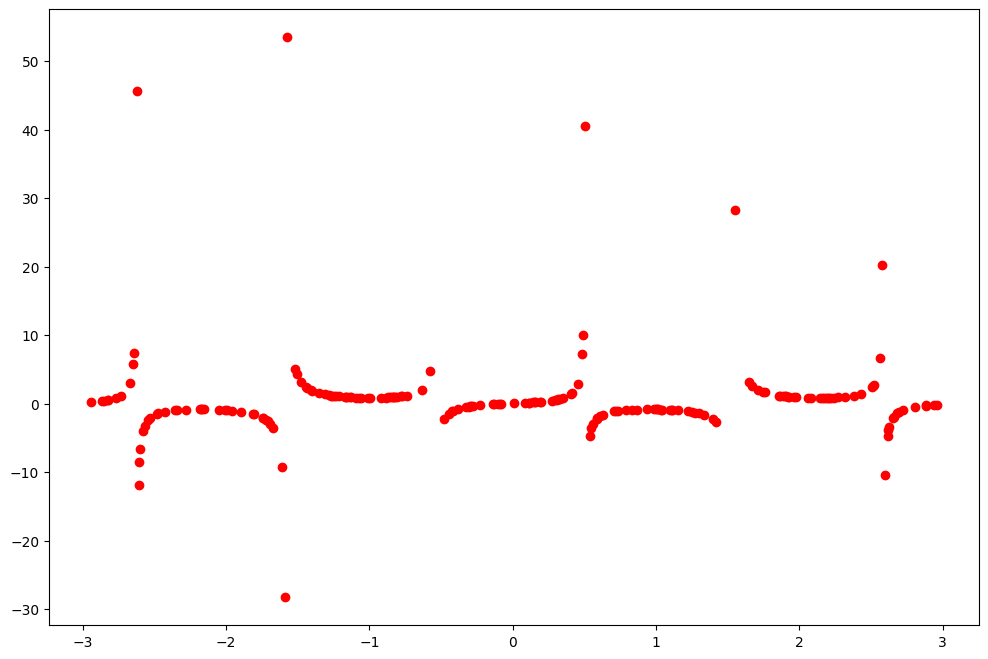

In [ ]:
print("Test Loss:", loss)
# Calculate R-squared


plt.figure(figsize=(12, 8))
plt.scatter(X_f2_test, y_f2_test , color='red', label='Original Data')
plt.scatter(X_f2_test, predicted, color='blue', label='MLP Predictions')
plt.legend()
plt.show()

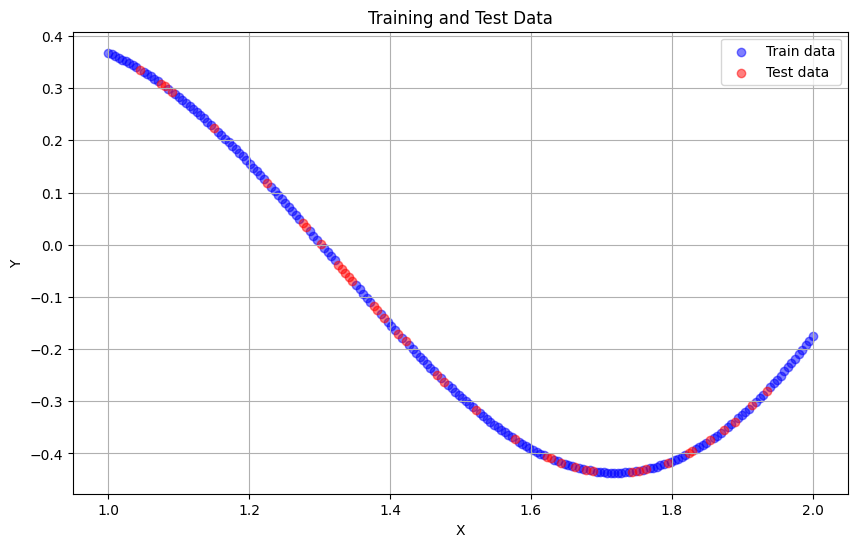

In [ ]:
#f3

def f3(x):
    return np.exp(-x**2) + np.log(x)*np.sin(3*x)

# Generate synthetic data

x_f3 = np.linspace(1,2, 200)
y_f3 = f3(x_f3)



# Reshape x to match the expected shape for scikit-learn (2D array)
X_f3 = x_f3.reshape(-1, 1)

# Split the data
X_f3_train, X_f3_test, y_f3_train, y_f3_test = train_test_split(X_f3, y_f3, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X_f3_train,y_f3_train, color='blue', label='Train data', alpha=0.5)
plt.scatter(X_f3_test, y_f3_test, color='red', label='Test data', alpha=0.5)
plt.legend()
plt.title("Training and Test Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [ ]:


model = Sequential([


    Dense(512, activation='relu'),                     # input layer
    Dense(256, activation='relu'),                     # Hidden layer 1
    Dense(128, activation='relu'),                     # Hidden layer 2
    Dense(64, activation='relu'),                      # Hidden layer 3
    Dense(1)                                           # Output layer
])


# Compile the model
model.compile(optimizer='adam', loss='mse')

# examining model and results

model.fit(X_f3_train, y_f3_train, epochs=100, batch_size=32)
predicted = model.predict(X_f3_test)
loss = model.evaluate(X_f3_test, y_f3_test, verbose=1)



Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 0.0717
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0647
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0591
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0565
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0539
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0439
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0388
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0330
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0276
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0222
Epoch 13/100
5/5 [==============================] - 0s 4ms/st

Test Loss: 2.353436138946563e-05
2/2 [==============================] - 0s 4ms/step


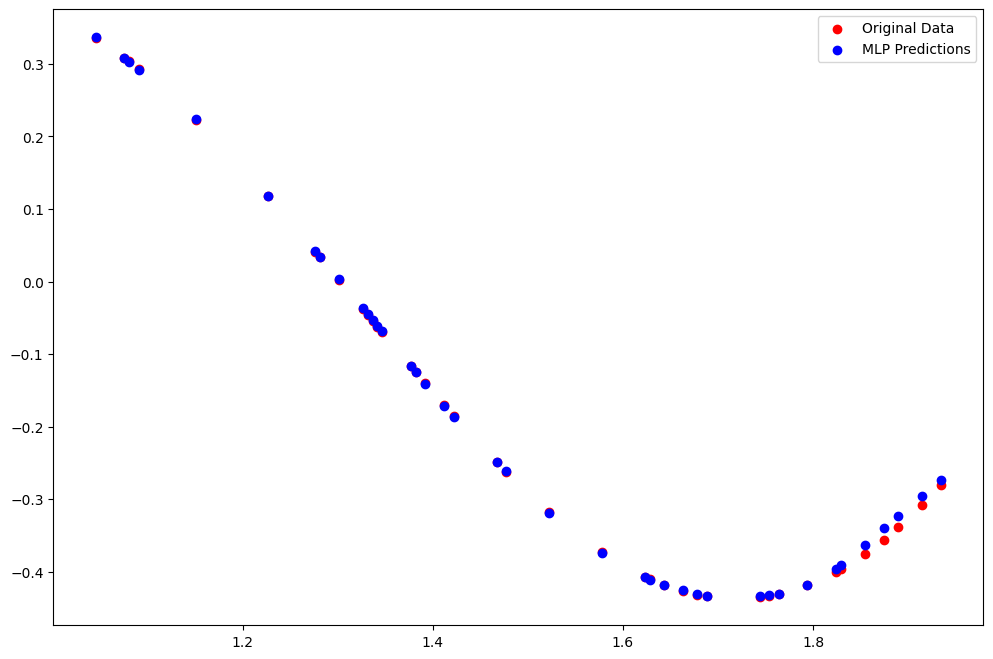

In [ ]:
print("Test Loss:", loss)

# Predicting on the test data
predicted = model.predict(X_f3_test)


# Plotting the results
plt.figure(figsize=(12, 8))
plt.scatter(X_f3_test, y_f3_test, color='red', label='Original Data')
plt.scatter(X_f3_test, predicted, color='blue', label='MLP Predictions')
plt.legend()
plt.show()

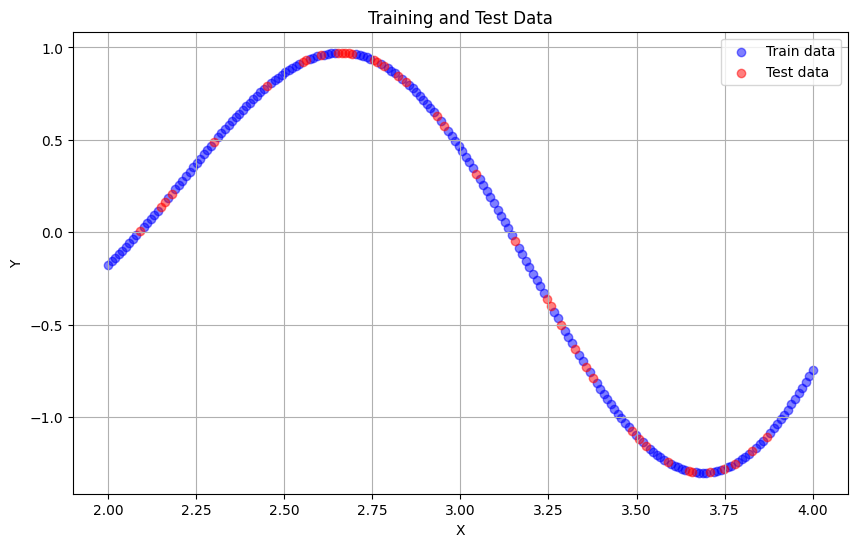

In [ ]:
#f3
def f3(x):
    return np.exp(-x**2) + np.log(x)*np.sin(3*x)

# Generate synthetic data

x_f3 = np.linspace(2,4, 200)
y_f3 = f3(x_f3)



# Reshape x to match the expected shape for scikit-learn (2D array)
X_f3 = x_f3.reshape(-1, 1)

# Split the data
X_f3_train, X_f3_test, y_f3_train, y_f3_test = train_test_split(X_f3, y_f3, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X_f3_train,y_f3_train, color='blue', label='Train data', alpha=0.5)
plt.scatter(X_f3_test, y_f3_test, color='red', label='Test data', alpha=0.5)
plt.legend()
plt.title("Training and Test Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 0.8857
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7626
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5938
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5104
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5786
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4832
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4039
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3662
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3618
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3431
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.3458
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4000
Epoch 13/100
5/5 [==============================] - 0s 4ms/st

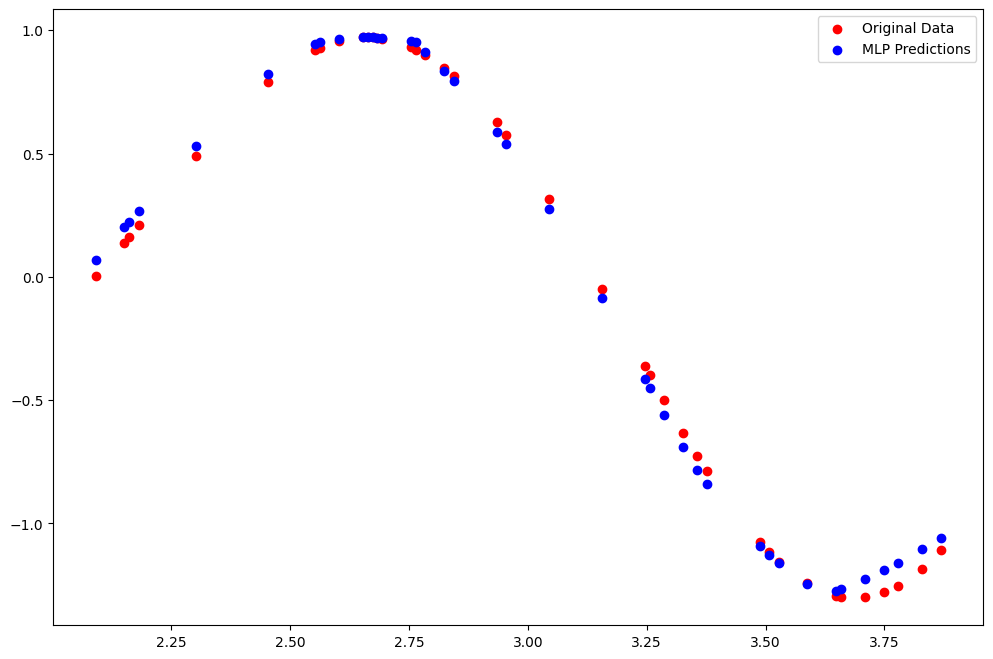

In [ ]:
model = Sequential([

    Dense(1024, activation='relu'),                    # input layer
    Dense(512, activation='tanh'),                     # Hidden layer 1
    Dense(256, activation='tanh'),                     # Hidden layer 2
    Dense(128, activation='tanh'),                     # Hidden layer 3
    Dense(64, activation='relu'),                    # Hidden layer 4
    Dense(1)                                             # Output layer
])


# Compile the model
model.compile(optimizer='adam', loss='mse')

# examining model and results

model.fit(X_f3_train, y_f3_train, epochs=100, batch_size=32)
predicted = model.predict(X_f3_test)
loss = model.evaluate(X_f3_test, y_f3_test, verbose=1)

print("Test Loss:", loss)

# Predicting on the test data
predicted = model.predict(X_f3_test)


# Plotting the results
plt.figure(figsize=(12, 8))
plt.scatter(X_f3_test, y_f3_test, color='red', label='Original Data')
plt.scatter(X_f3_test, predicted, color='blue', label='MLP Predictions')
plt.legend()
plt.show()

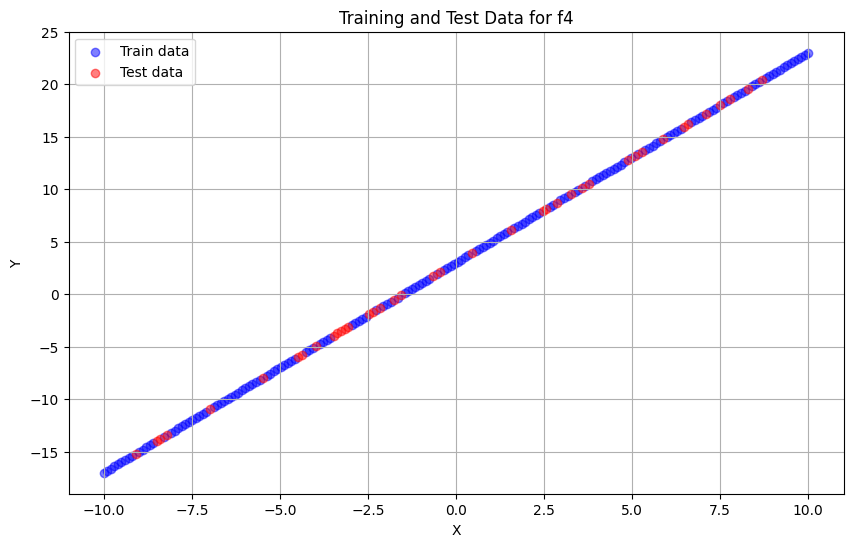

In [ ]:
def f4(x):
    return 2 * x + 3

# Generate synthetic data
x_f4 = np.linspace(-10, 10, 200)
y_f4 = f4(x_f4)



# Reshape x to match the expected shape for scikit-learn (2D array)
X_f4 = x_f4.reshape(-1, 1)

# Split the data
X_f4_train, X_f4_test, y_f4_train, y_f4_test = train_test_split(X_f4, y_f4, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X_f4_train, y_f4_train, color='blue', label='Train data', alpha=0.5)
plt.scatter(X_f4_test, y_f4_test, color='red', label='Test data', alpha=0.5)
plt.legend()
plt.title("Training and Test Data for f4")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


Epoch 1/50
5/5 [==============================] - 1s 5ms/step - loss: 134.9641
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 110.5166
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 88.6719
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 67.5390
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 47.6490
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 28.7482
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 13.3648
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 5.0226
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 1.8140
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 2.1108
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 2.7666
Epoch 12/50
5/5 [==============================] - 0s 4ms/step - loss: 2.3169
Epoch 13/50
5/5 [==============================] - 0s 5ms/step -

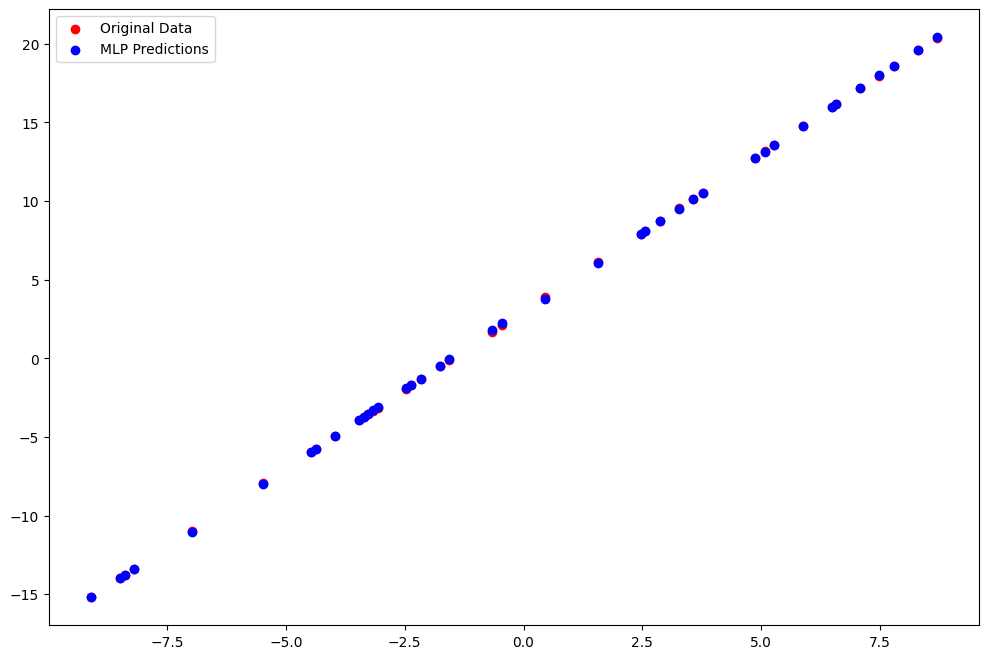

In [ ]:
# building mlp model

model = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),  # Input layer
    Dense(64, activation='relu'),                       # Hidden layer 1
    Dense(32, activation='linear'),                        # Hidden layer 2
    Dense(1)                                             # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# examining model and results

model.fit(X_f4_train, y_f4_train, epochs=50, batch_size=32)
predicted = model.predict(X_f4_test)

plt.figure(figsize=(12, 8))
plt.scatter(X_f4_test, y_f4_test , color='red', label='Original Data')
plt.scatter(X_f4_test, predicted, color='blue', label='MLP Predictions')
plt.legend()
plt.show()


In [ ]:
#noise-f2


# Define the noisy function
def f2(x):
    return np.sin(x) / np.cos(3*x)

# Define the range of x values
x2_values = np.linspace(-10, 10, 100)

# Generate random noise between 0 and a high value
high_noise = 10
noise = np.random.uniform(0, high_noise, len(x_values))

# Calculate the function values with added noise
y2_values_with_noise = f2(x_values) + noise

# Create an MLP model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(1,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x2_values, y2_values_with_noise, epochs=100, verbose=0)

# Predict using the trained model
predicted_values = model.predict(x2_values)

# Plot the original function, noisy function, and predicted function
plt.figure(figsize=(10, 6))
plt.plot(x2_values, f2(x2_values), label='Original Function')
plt.scatter(x2_values, y2_values_with_noise, color='red', label='Function with Noise')
plt.plot(x2_values, predicted_values, color='green', label='Predicted Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function with Added Noise and Predicted Function')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'x_values' is not defined

4/4 [==============================] - 0s 3ms/step


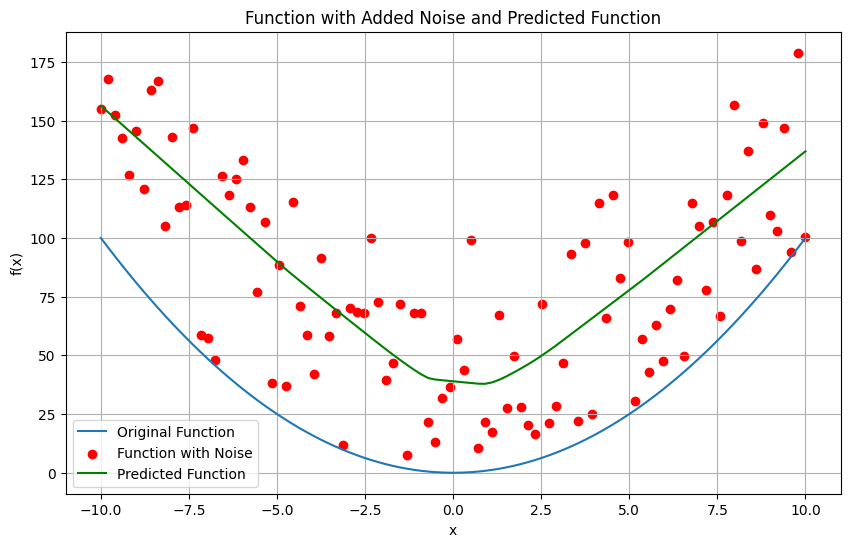

In [ ]:
#noise-f1


# Define the function with noise
def f1_with_noise(x):
    return x**2 + np.random.uniform(0, high_noise, len(x))

# Define the range of x values
x1_values = np.linspace(-10, 10, 100)

# Generate random noise between 0 and a high value
high_noise = 100

# Calculate the noisy function values
y1_values_with_noise = f1_with_noise(x1_values)

# Create an MLP model
model = Sequential([
    Dense(512, activation='relu', input_shape=(1,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x1_values, y1_values_with_noise, epochs=100, verbose=0)

# Predict using the trained model
predicted_values = model.predict(x1_values)

# Plot the original function, noisy function, and predicted function
plt.figure(figsize=(10, 6))
plt.plot(x1_values, f1(x1_values), label='Original Function')
plt.scatter(x1_values, y1_values_with_noise, color='red', label='Function with Noise')
plt.plot(x1_values, predicted_values, color='green', label='Predicted Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function with Added Noise and Predicted Function')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100
4/4 [==============================] - 3s 6ms/step - loss: 34.4823
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 25.3209
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 16.8893
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 16.3271
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 15.7366
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 14.0472
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 14.7722
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 14.8999
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 14.1092
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 13.7138
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 13.8374
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 13.4082
Epoch 13/100
4/4 [==============================]

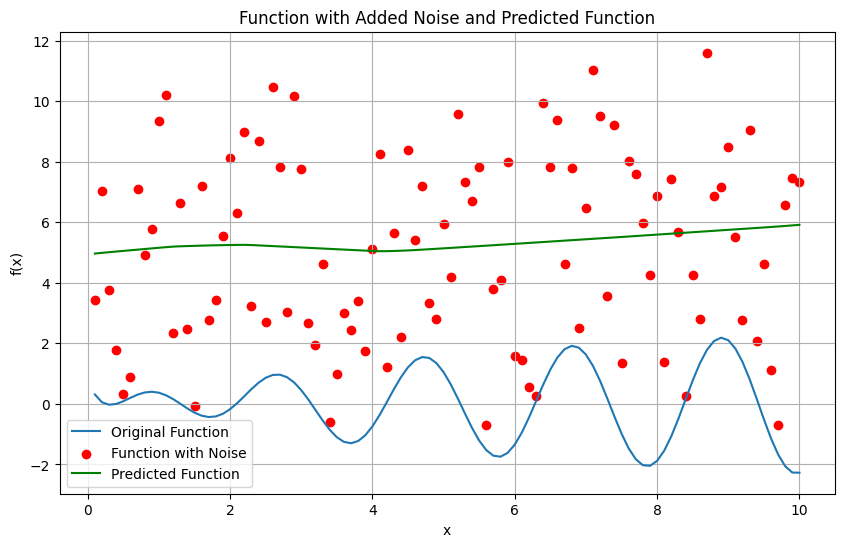

In [ ]:
#noise-f3


# Define the function with noise
def f3_with_noise(x):
    return np.exp(-x**2) + np.log(x)*np.sin(3*x) + np.random.uniform(0, high_noise, len(x))

# Define the range of x values
x3_values = np.linspace(0.1, 10, 100)  # Adjusted the range to avoid log(0) and division by zero issues

# Generate random noise between 0 and a high value
high_noise = 10

# Calculate the noisy function values
y3_values_with_noise = f3_with_noise(x3_values)

# Create an MLP model
model = Sequential([
    Dense(512, activation='relu', input_shape=(1,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x3_values, y3_values_with_noise, epochs=100)

# Predict using the trained model
predicted_values = model.predict(x3_values)

# Plot the original function, noisy function, and predicted function
plt.figure(figsize=(10, 6))
plt.plot(x3_values, f3(x3_values), label='Original Function')
plt.scatter(x3_values, y3_values_with_noise, color='red', label='Function with Noise')
plt.plot(x3_values, predicted_values, color='green', label='Predicted Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function with Added Noise and Predicted Function')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#noise-f4

# Define the function with noise
def f4_with_noise(x):
    return 2*x + 3 + np.random.uniform(0, high_noise, len(x))

# Define the range of x values
x4_values = np.linspace(-10, 10, 100)

# Generate random noise between 0 and a high value
high_noise = 10

# Calculate the noisy function values
y4_values_with_noise = f4_with_noise(x_values)

# Create an MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x4_values, y4_values_with_noise, epochs=100, verbose=0)

# Predict using the trained model
predicted_values = model.predict(x4_values)

# Plot the original function, noisy function, and predicted function
plt.figure(figsize=(10, 6))
plt.plot(x4_values, f4(x4_values), label='Original Function')
plt.scatter(x4_values, y4_values_with_noise, color='red', label='Function with Noise')
plt.plot(x4_values, predicted_values, color='green', label='Predicted Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function with Added Noise and Predicted Function')
plt.legend()
plt


In [ ]:
import pandas as pd
df = pd.read_csv("data.csv")
df

,x,y,z
0,20,346.333328,a
1,20,346.333328,a
2,24,347.333328,a
3,30,349.333328,a
4,40,353.333328,a
...,...,...,...
172,688,374.333328,a
173,689,375.333328,a
174,691,375.333328,a
175,692,375.333328,a


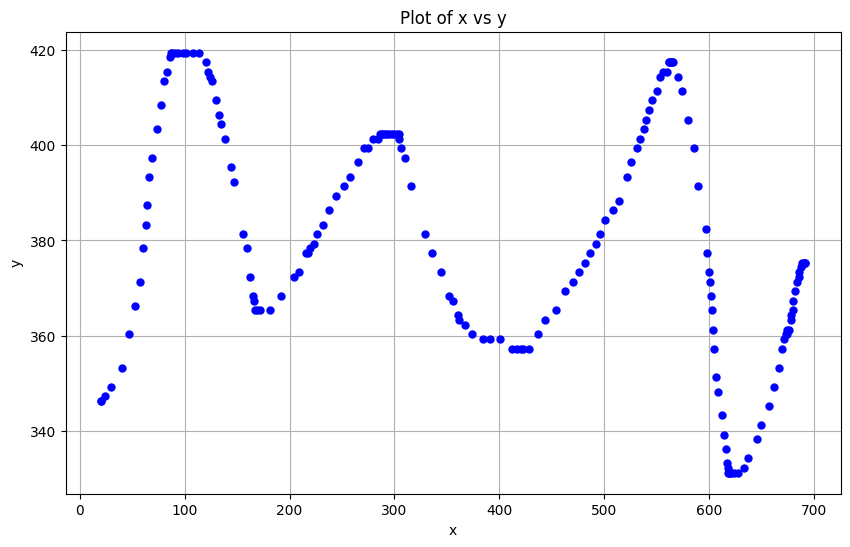

In [ ]:


# Assuming df is your DataFrame with columns 'x' and 'y'
x = df['x']
y = df['y']

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', color='blue', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of x vs y')
plt.grid(True)
plt.show()




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


from sklearn.model_selection import KFold

# Assuming X_train, X_test, y_train, y_test are already defined
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for K-fold cross-validation
X = np.array(X_train).reshape(-1, 1)
y = np.array(y_train)

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store the results
losses = []

# Perform K-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Create the model
    model = Sequential([
        Dense(4096, activation='relu', input_shape=(1,)),  # Input layer
        Dense(4096, activation='relu'),                       # Hidden layer 1
        Dense(2048, activation='relu'),                   # Hidden layer 2
        Dense(1024, activation='relu'),                   # Hidden layer 3
        Dense(512, activation='relu'),                    #Hidden layer 4
        Dense(256, activation='relu'),                  #Hidden layer 5
        Dense(128, activation='relu'),                    #Hidden layer 6
        Dense(64, activation='relu'),                  # Hidden layer 7
        Dense(1)                                             # Output layer
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

    # Evaluate the model on the validation set
    loss = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    losses.append(loss)

# Compute the average loss across all folds
average_loss = np.mean(losses)
print("Average Validation Loss:", average_loss)

# Now train the model on the entire training set
model.fit(X_train, y_train, epochs=300, batch_size=64, verbose=0)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)

# Predict on the test set
predicted = model.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test , color='red', label='Original Data')
plt.scatter(X_test, predicted, color='blue', label='MLP Predictions')
plt.legend()
plt.show()


# Define the evaluation function





ValueError: Found input variables with inconsistent numbers of samples: [177, 141]